In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import scipy.misc
from skimage.morphology import flood
from PIL import Image

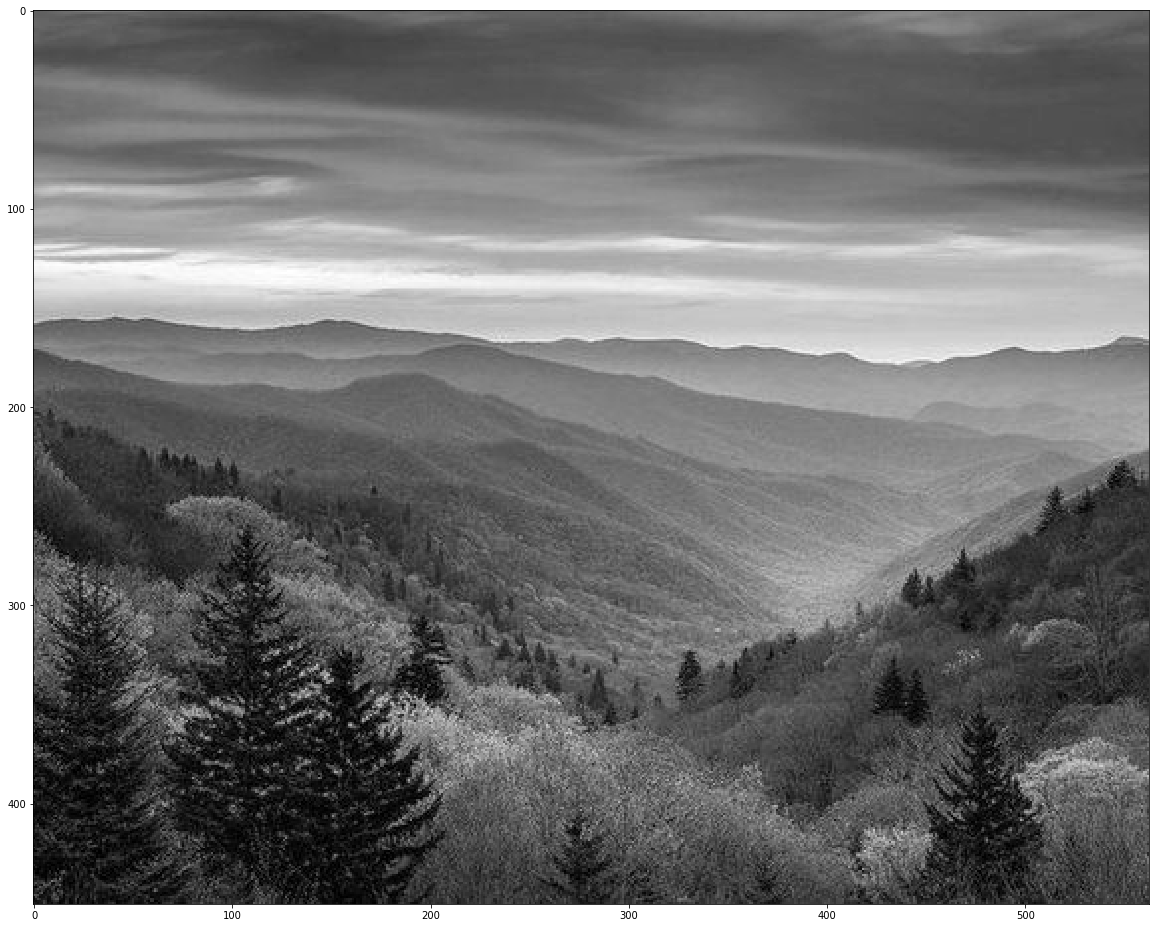

In [39]:
image = cv2.imread("../data/img5.jpg", 0)
plt.figure(figsize=(20,20))
plt.imshow(image, cmap = "gray")

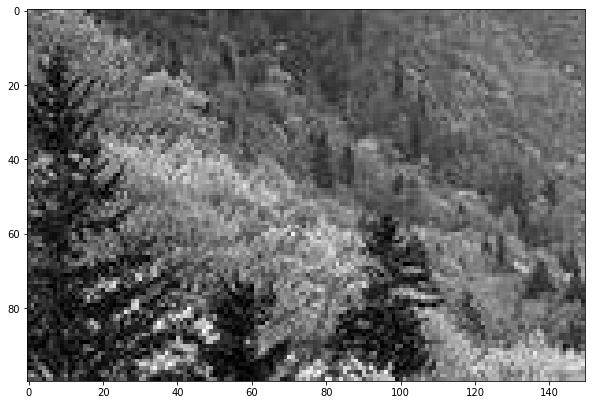

In [40]:
image = image[250:350, 100:250]
plt.figure(figsize=(10,10))
plt.imshow(image, cmap = "gray")

In [41]:
def quantize(img, num_grey):
    '''
        Threshold into number of grey values
    '''
    pil_img = Image.fromarray(image)
    pil_img = pil_img.quantize(num_grey)
    reduced_image = np.array(pil_img)
    return reduced_image

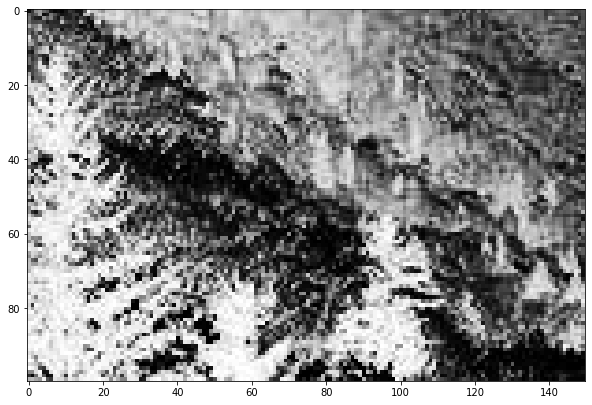

In [42]:
num_grey = 72

reduced_image = quantize(image, num_grey)

plt.figure(figsize=(10, 10))
plt.imshow(reduced_image, cmap='gray')

In [43]:
# Flood fill

def getFloodMasks(img, tol, conn = 1):
    # tol : tolerance within a flooded segment
    # conn : connectivity, 1 for 4-conn, 2 for 8-conn (defaults to 4-conn)
    masks = []
    allmasks = np.zeros_like((image)).astype("bool")
    x,y = 0,0

    while allmasks.all() == False:
        mask = flood(image, (x,y), tolerance=30, connectivity=1)
        masks.append(mask)
        allmasks = np.logical_or(allmasks, mask)

        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if allmasks[i,j] == False:
                    x,y = i, j
                    break
    return masks

290


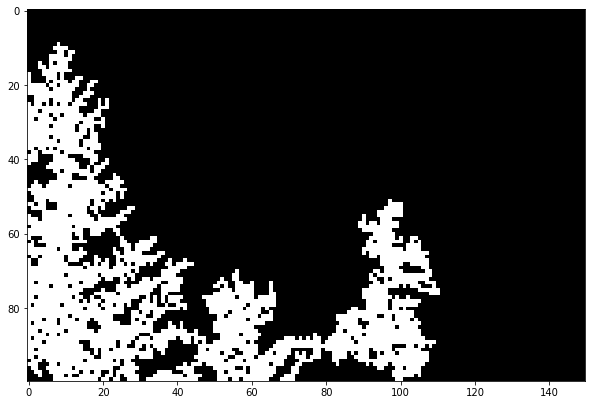

In [44]:
masks = getFloodMasks(reduced_image, 20)
print(len(masks))

plt.figure(figsize=(10, 10))
plt.imshow(masks[11], cmap='gray')

In [45]:
masks_count = []
for mask in masks:
    count = np.count_nonzero(mask)
    masks_count.append(count)

# sorted_ind = np.flip(np.argsort(masks_count))
sorted_ind = np.argsort(masks_count)
sorted_masks = np.array(masks)[sorted_ind]

In [46]:
np.array(masks_count)[sorted_ind]

array([   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,   

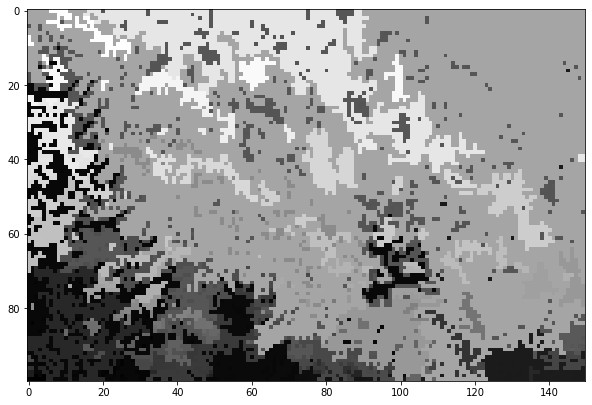

In [47]:
def masksToLabel(masks):
    label = np.zeros_like((masks[0])).astype("uint32")
    for i in range(len(masks)):
        label[masks[i] == True] = i
    return label

# label = masksToLabel(sorted_masks)
label = masksToLabel(masks)

plt.figure(figsize=(10, 10))
plt.imshow(label, cmap="gray")

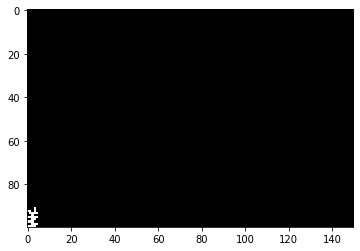

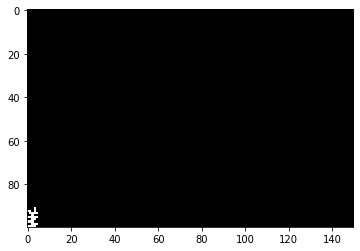

In [48]:
res = []
# masks = sorted_masks.copy()
for mask in masks:
    mask_not = np.logical_not(mask)
    mask_not = np.pad(mask_not, pad_width=1, mode='constant', constant_values=1)
    # x,y = nearest_nonzero_idx_v2(mask[11].astype(int), 0,0)
    a = np.transpose(np.nonzero(mask_not))[0]
    mask_flood = flood(mask_not.astype(int), (a[0],a[1]), connectivity = 1)
    res.append(mask + np.logical_not(np.logical_or(mask, mask_flood[1:mask.shape[0]+1,1:mask.shape[1]+1])))
plt.figure()
plt.imshow(masks[1], cmap = "gray")
plt.figure()
plt.imshow(res[1], cmap="gray")

res = np.asarray(res)

In [49]:
label = np.zeros_like((image)).astype("uint32")
for i in range(len(res)):
    # masks[i][masks[i] == True] = i
    label[res[i] == True] = i + 1

np.unique(label)

array([  2,   3,   5,   7,   8,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  20,  22,  25,  26,  27,  28,  29,  32,  33,  34,  35,  36,
        38,  40,  42,  43,  44,  46,  47,  48,  49,  51,  52,  53,  54,
        57,  59,  60,  61,  63,  64,  65,  66,  67,  68,  69,  70,  72,
        74,  75,  76,  79,  80,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  97,  98,  99, 100, 101, 102, 104, 105,
       106, 107, 108, 111, 112, 113, 115, 116, 118, 119, 120, 121, 122,
       125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 140, 141, 142,
       143, 144, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157,
       158, 159, 160, 162, 163, 164, 168, 169, 170, 173, 174, 175, 176,
       177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 22

In [50]:
(label == 0).any()

False

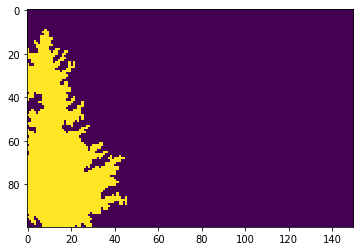

In [51]:
plt.imshow(res[4])

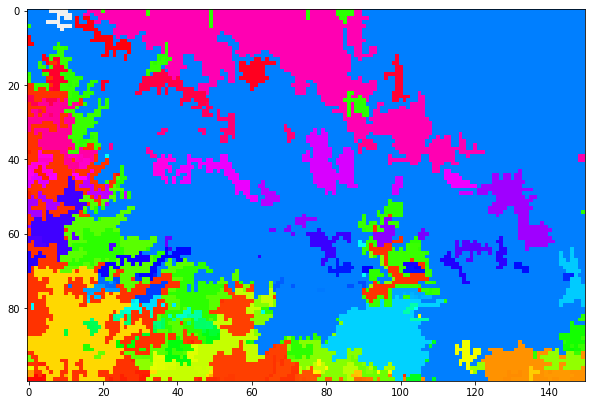

In [52]:
import colorsys

unique_vals = np.unique(label)
for val in range(len(unique_vals)):
    label[label == unique_vals[val]] = val + 1
    
colored_label = np.zeros((image.shape[0], image.shape[1], 3))
colored_label[:, :, 0] = label
colored_label[:, :, 1] = label
colored_label[:, :, 2] = label
colored_label = colored_label.astype('uint8')


num_regions = len(np.unique(label))

for i in range(1, num_regions):
    colored_label[label == i] = np.array(colorsys.hsv_to_rgb(i / num_regions, 1, 1)) * 255

plt.figure(figsize=(10, 10))
plt.imshow(colored_label)

[  1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19
  20  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  73  75  76  77  78
  79  82  83  85  88  90  91  95  96  97  98  99 100 101 104 105 106 107
 109 110 111 112 113 114 115 116 117 118 119 120 122 123 125 126 127 131
 132 134 135 136 137 138 139 140 141 143 144 146 147 148 149 150 151 152
 154 156 157 159 160 161 162 163 169 170 173 176 179 180 181 182 183 186
 188 190 191 195 196 197 202 205 206 207 208 209 210 211 212 214 215 216
 217 219 225 226 229 233 236 261 278]


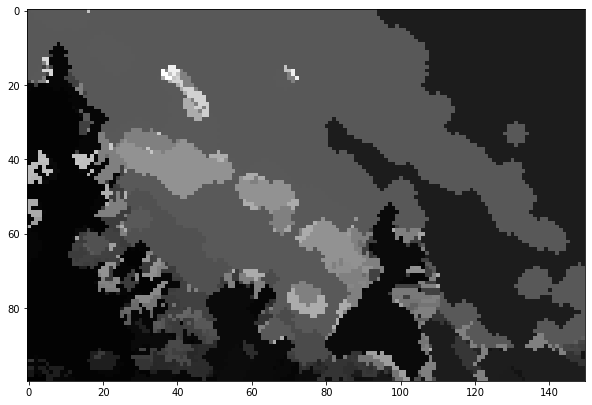

In [53]:
from skimage.morphology import disk
result = np.zeros_like(label)

morphed_masks = []

i = 1
for mask in masks:
    closing = skimage.morphology.opening(mask, disk(2))
    closing = skimage.morphology.opening(closing, disk(1))
    opening = skimage.morphology.closing(closing, disk(3))
    if opening.any():
        result[np.logical_and(opening==True, result == 0)] = i 
    i += 1
    morphed_masks.append(opening)

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if result[i,j] == 0:
            result[i,j] = label[i,j]


# for i in range(result.shape[0]):
#     for j in range(result.shape[1]):
#         if result[i,j] == 0:
#             x, y = nearest_nonzero_idx_v2(result, i, j)
#             result[i,j] = result[x,y]

print(np.unique(result))
plt.figure(figsize=(10, 10))
plt.imshow(result, cmap="gray")

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171]


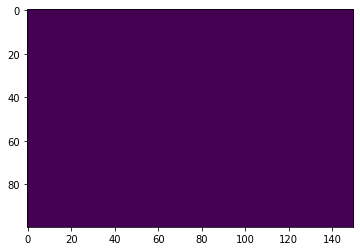

In [57]:
unique_vals = np.unique(result)
for val in range(len(unique_vals)):
    result[result == unique_vals[val]] = val + 1

print(np.unique(result))
plt.imshow((result == 0))

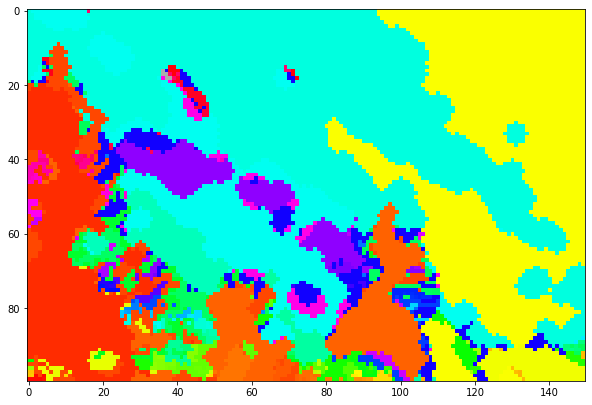

In [55]:
colored_result = np.zeros((image.shape[0], image.shape[1], 3))
colored_result[:, :, 0] = result
colored_result[:, :, 1] = result
colored_result[:, :, 2] = result
colored_result = colored_result.astype('uint8')


num_regions = len(np.unique(result))

for i in range(1, num_regions):
    colored_result[result == i] = np.array(colorsys.hsv_to_rgb(i / num_regions, 1, 1)) * 255

plt.figure(figsize=(10, 10))
plt.imshow(colored_result)

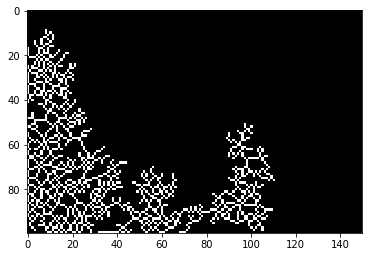

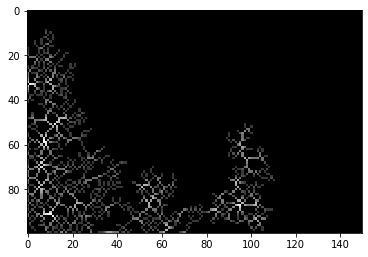

In [56]:
from skimage.morphology import medial_axis

# result = np.zeros_like(label)
# for labelnu in np.unique(label):
im_th = np.asarray(masks[11].copy())
skeleton, distance = medial_axis(im_th, return_distance=True)
    
dist_masked = distance * skeleton

plt.figure(figsize=(6, 6))
plt.imshow(skeleton, cmap="gray")
plt.figure(figsize=(6, 6))
plt.imshow(dist_masked, cmap="gray")